In [1]:
pip install tensorflow matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

# Set directories
base_dir = "./images/childrenadultsData"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

# Hyperparameters
img_size = (128, 128)  # Image dimensions
batch_size = 32
epochs = 15

# Data Augmentation and Generators
train_datagen = ImageDataGenerator(rescale=1.0 / 255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"
)

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])



Found 560 images belonging to 2 classes.
Found 160 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


d:\RESEARCH\companion\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")


d:\RESEARCH\companion\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 689ms/step - accuracy: 0.4530 - loss: 0.8592

d:\RESEARCH\companion\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 851ms/step - accuracy: 0.4548 - loss: 0.8537 - val_accuracy: 0.5750 - val_loss: 0.6912
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 421ms/step - accuracy: 0.5376 - loss: 0.6905 - val_accuracy: 0.5938 - val_loss: 0.6803
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 447ms/step - accuracy: 0.5212 - loss: 0.6800 - val_accuracy: 0.5375 - val_loss: 0.6894
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 420ms/step - accuracy: 0.5778 - loss: 0.6919 - val_accuracy: 0.6062 - val_loss: 0.6670
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 420ms/step - accuracy: 0.5928 - loss: 0.6688 - val_accuracy: 0.6313 - val_loss: 0.6373
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 415ms/step - accuracy: 0.6131 - loss: 0.6491 - val_accuracy: 0.5875 - val_loss: 0.6334
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 422ms/step - accuracy: 0.5555 - loss: 0.6656 - val_accuracy: 0.5562 - val_loss: 0.6574
Epoch 8/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 442ms/step - accuracy: 0.5640 - loss: 0.6596 - val_accuracy: 0.6000 - val

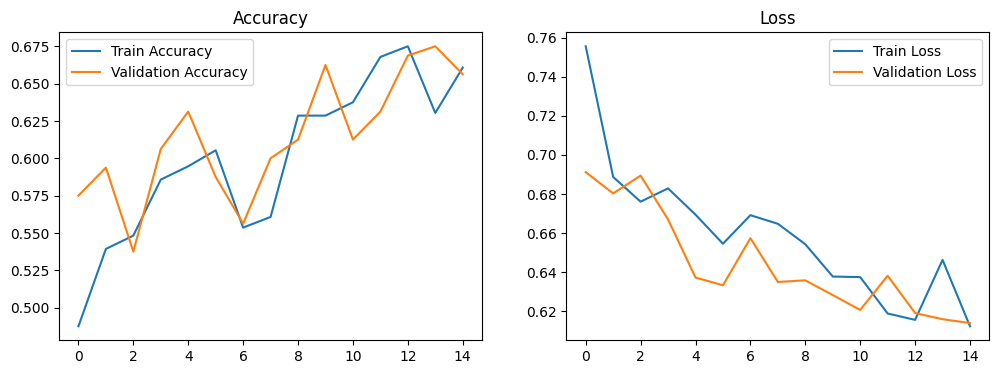

In [7]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss")

plt.show()

# Test with a single image
def test_single_image(image_path):
    image = load_img(image_path, target_size=img_size)
    image_array = img_to_array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    prediction = model.predict(image_array)[0][0]
    if prediction > 0.5:
        label = "Child"
    else:
        label = "Adult"

    plt.imshow(image)
    plt.title(f"Predicted: {label} ({prediction:.2f})")
    plt.axis("off")
    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


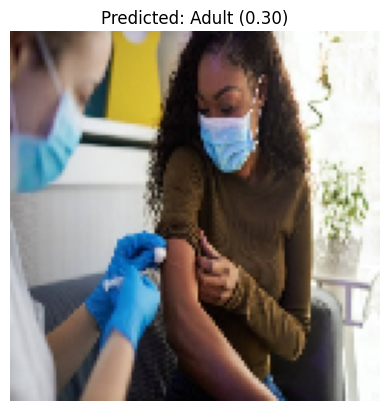

In [10]:

test_single_image("images/childrenadultsData/test/adults/5.jpg")

In [6]:

# Save the model
model.save("age_classifier.keras")